Luc Parat - Full Stack 2022

Certification : Concepteur - Dévelopeur en Science des données

Bloc 3 - Analyse prédictive de données structurées par l'intelligence artificielle

---

# Conversion rate challenge

---

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

---

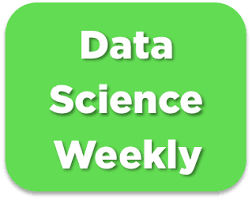

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
!pip install -U kaleido
!pip install kaleido

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

# Read file with labels

In [3]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [5]:
# Basics statistics:
data_desc = data.describe(include='all')
display(data_desc)

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [6]:
# Checking missing values
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

# Explore dataset

In [7]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [8]:
data_sample[['new_user','age']].groupby('new_user').agg(['mean','min','max'])

age        
               mean min max
new_user                   
0         30.426837  17  62
1         30.704221  17  66

In [9]:
data_sample[['converted','total_pages_visited']].groupby('converted').agg(['mean','count'])

total_pages_visited      
                         mean count
converted                          
0                    4.559476  9693
1                   14.530945   307

In [10]:
data_sample[['source','converted']].groupby('source').agg(['count'])

,converted
,count
source,
Ads,2854
Direct,2258
Seo,4888


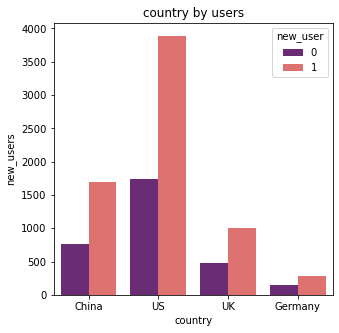

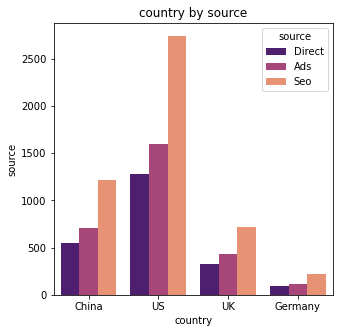

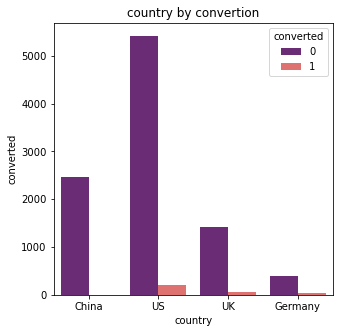

In [11]:
# By 'country'

plt.figure(figsize = (5,5))
sns.countplot(x='country', data=data_sample, hue='new_user', palette="magma")
plt.xlabel('country')
plt.ylabel('new_users')
plt.title('country by users')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='country', data=data_sample, hue='source', palette="magma")
plt.xlabel('country')
plt.ylabel('source')
plt.title('country by source')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='country', data=data_sample, hue='converted', palette="magma")
plt.xlabel('country')
plt.ylabel('converted')
plt.title('country by convertion')
plt.show()

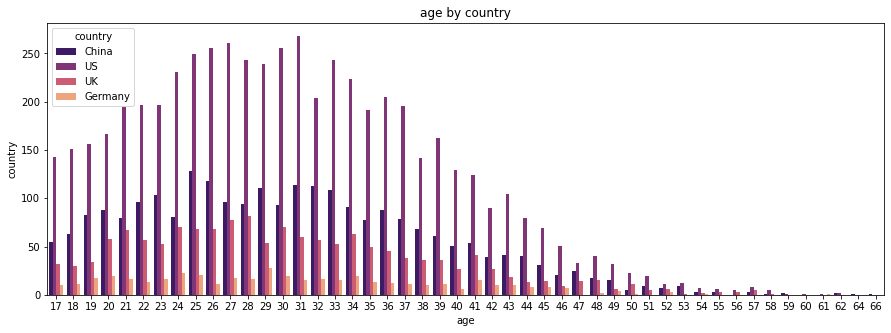

<Figure size 432x288 with 0 Axes>

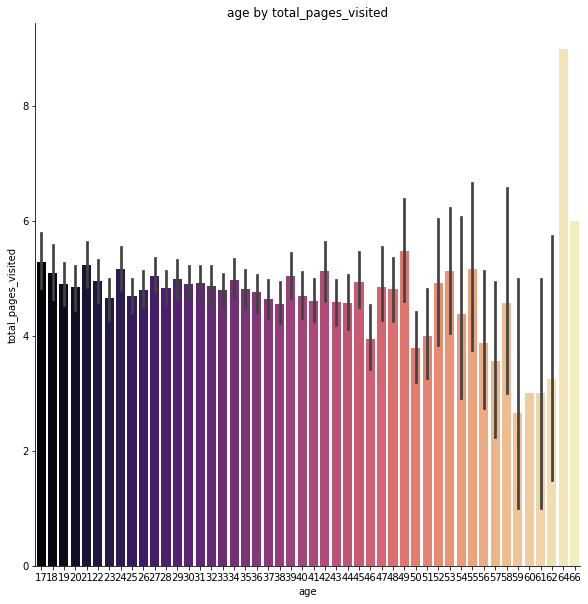

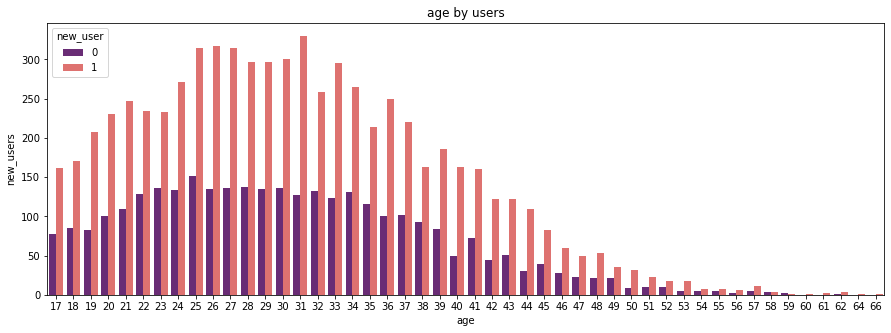

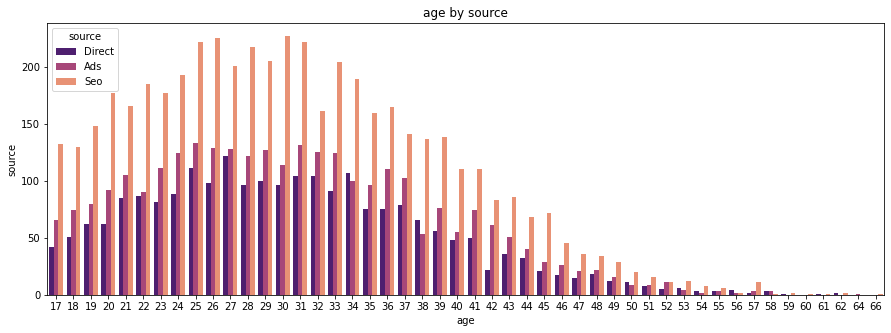

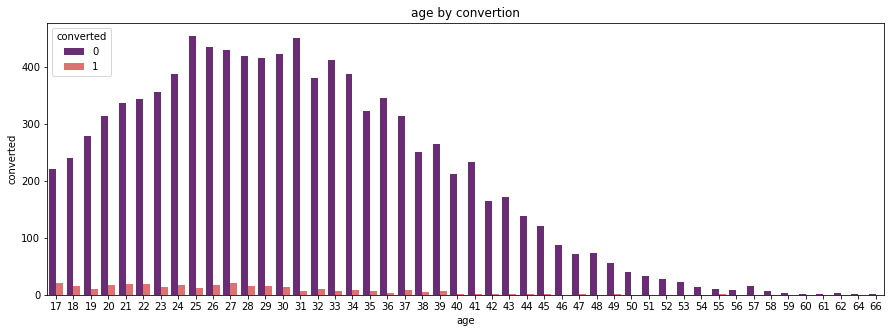

In [12]:
# By 'age'

plt.figure(figsize = (15,5))
sns.countplot(x='age', data=data_sample, hue='country', palette="magma")
plt.xlabel('age')
plt.ylabel('country')
plt.title('age by country')
plt.show()

plt.figure()
sns.catplot(x="age", data=data_sample, y="total_pages_visited", kind="bar", palette="magma", height=8.27)
plt.xlabel('age')
plt.ylabel('total_pages_visited')
plt.title('age by total_pages_visited')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='age', data=data_sample, hue='new_user', palette="magma")
plt.xlabel('age')
plt.ylabel('new_users')
plt.title('age by users')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='age', data=data_sample, hue='source', palette="magma")
plt.xlabel('age')
plt.ylabel('source')
plt.title('age by source')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='age', data=data_sample, hue='converted', palette="magma")
plt.xlabel('age')
plt.ylabel('converted')
plt.title('age by convertion')
plt.show()

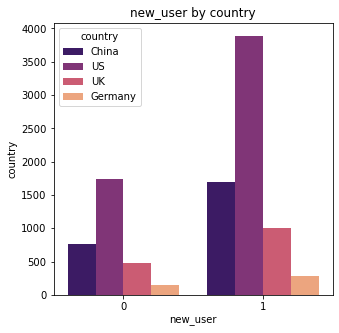

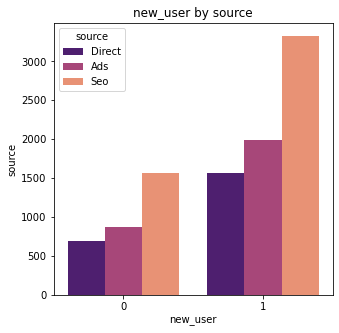

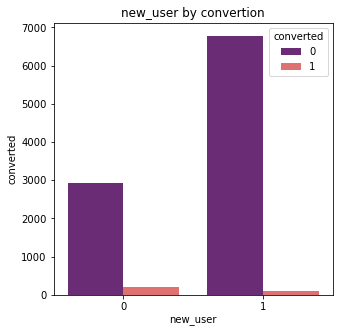

In [13]:
# By 'new_user'

plt.figure(figsize = (5,5))
sns.countplot(x='new_user', data=data_sample, hue='country', palette="magma")
plt.xlabel('new_user')
plt.ylabel('country')
plt.title('new_user by country')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='new_user', data=data_sample, hue='source', palette="magma")
plt.xlabel('new_user')
plt.ylabel('source')
plt.title('new_user by source')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='new_user', data=data_sample, hue='converted', palette="magma")
plt.xlabel('new_user')
plt.ylabel('converted')
plt.title('new_user by convertion')
plt.show()

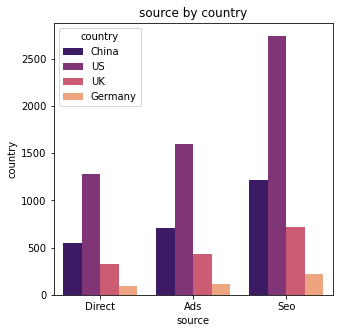

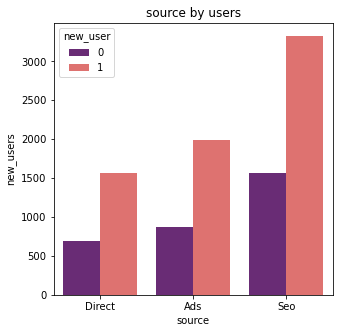

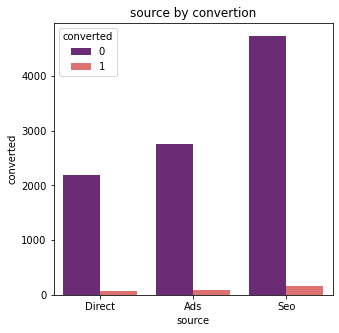

In [14]:
# By 'source' 
# Seo = Organic search from search engine
# Ads = Paid Search from key word campaign
# Direct = Direct access via url

plt.figure(figsize = (5,5))
sns.countplot(x='source', data=data_sample, hue='country', palette="magma")
plt.xlabel('source')
plt.ylabel('country')
plt.title('source by country')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='source', data=data_sample, hue='new_user', palette="magma")
plt.xlabel('source')
plt.ylabel('new_users')
plt.title('source by users')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='source', data=data_sample, hue='converted', palette="magma")
plt.xlabel('source')
plt.ylabel('converted')
plt.title('source by convertion')
plt.show()

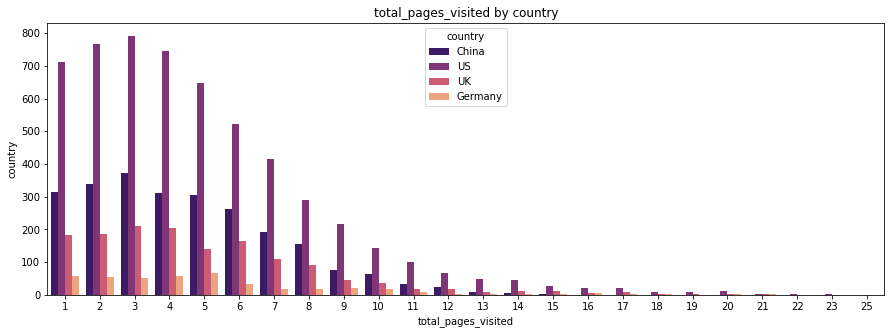

<Figure size 432x288 with 0 Axes>

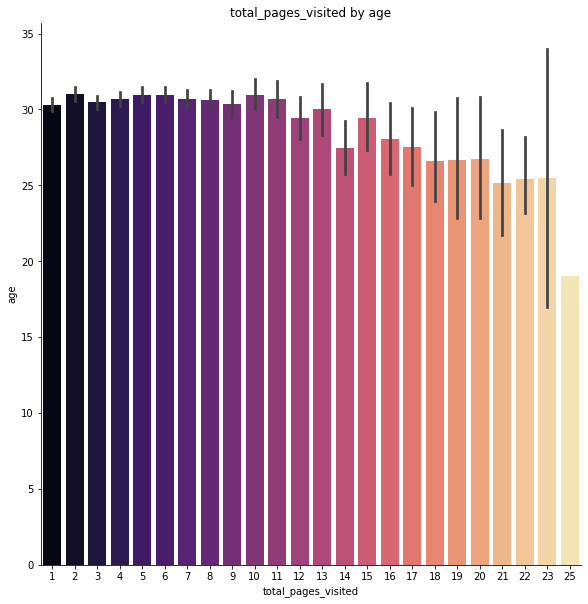

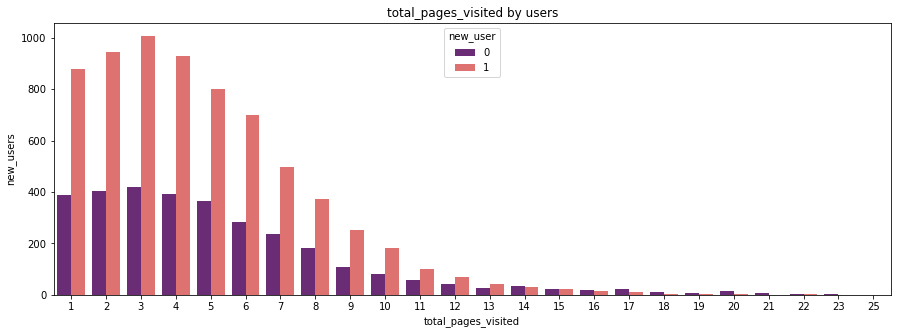

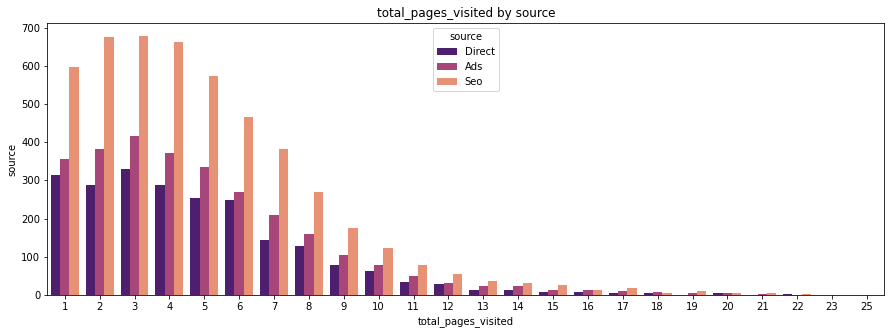

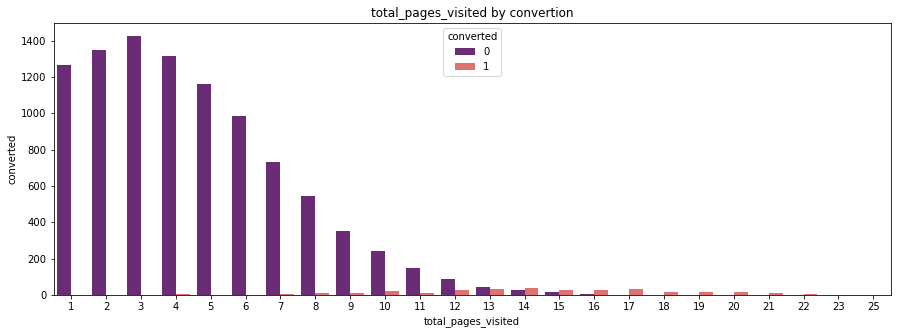

In [15]:
# By 'total_pages_visited'

plt.figure(figsize = (15,5))
sns.countplot(x='total_pages_visited', data=data_sample, hue='country', palette="magma")
plt.xlabel('total_pages_visited')
plt.ylabel('country')
plt.title('total_pages_visited by country')
plt.show()

plt.figure()
sns.catplot(x="total_pages_visited", data=data_sample, y="age", kind="bar", palette="magma", height=8.27)
plt.xlabel('total_pages_visited')
plt.ylabel('age')
plt.title('total_pages_visited by age')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='total_pages_visited', data=data_sample, hue='new_user', palette="magma")
plt.xlabel('total_pages_visited')
plt.ylabel('new_users')
plt.title('total_pages_visited by users')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='total_pages_visited', data=data_sample, hue='source', palette="magma")
plt.xlabel('total_pages_visited')
plt.ylabel('source')
plt.title('total_pages_visited by source')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(x='total_pages_visited', data=data_sample, hue='converted', palette="magma")
plt.xlabel('total_pages_visited')
plt.ylabel('converted')
plt.title('total_pages_visited by convertion')
plt.show()

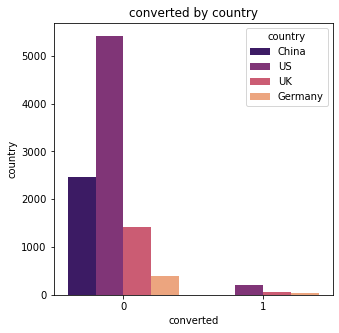

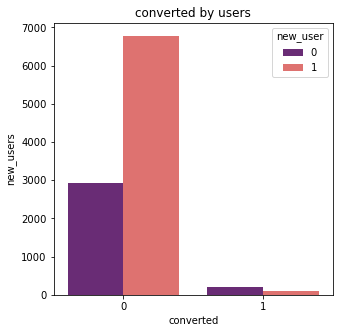

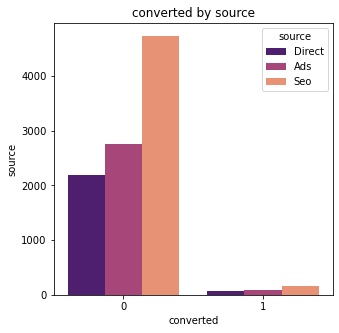

In [16]:
# By 'converted'

plt.figure(figsize = (5,5))
sns.countplot(x='converted', data=data_sample, hue='country', palette="magma")
plt.xlabel('converted')
plt.ylabel('country')
plt.title('converted by country')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='converted', data=data_sample, hue='new_user', palette="magma")
plt.xlabel('converted')
plt.ylabel('new_users')
plt.title('converted by users')
plt.show()

plt.figure(figsize = (5,5))
sns.countplot(x='converted', data=data_sample, hue='source', palette="magma")
plt.xlabel('converted')
plt.ylabel('source')
plt.title('converted by source')
plt.show()

In [17]:
# Rename 'country' (for correlation map)
data_sample['country'] = data_sample.country.map({
                 "US":1,"China":2, "Germany":3,"UK":4,}).fillna(data_sample.country)
data_sample.country.value_counts(dropna=False)

1    5621
2    2466
4    1478
3     435
Name: country, dtype: int64

In [18]:
# Rename 'source' (for correlation map)
data_sample['source'] = data_sample.source.map({
                 "Seo":1,"Ads":2, "Direct":3}).fillna(data_sample.country)
data_sample.source.value_counts(dropna=False)

1    4888
2    2854
3    2258
Name: source, dtype: int64

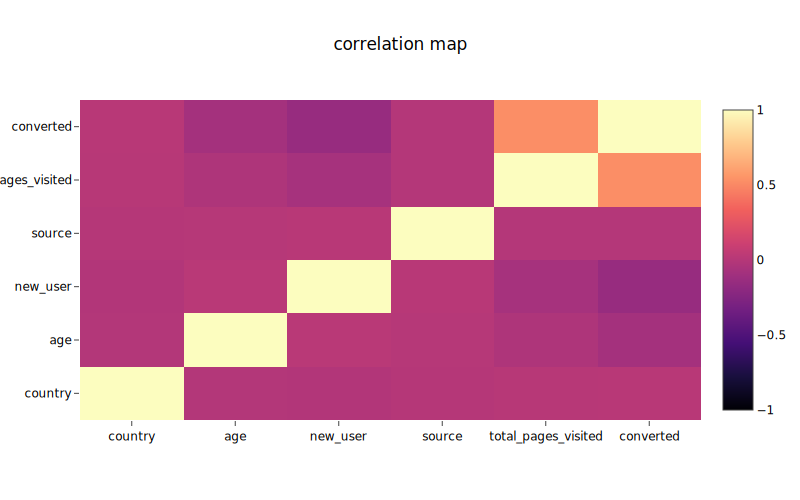

In [19]:
# Correlation map
corr_2 = data_sample[['country','age','new_user','source','total_pages_visited','converted']].corr()

# Heatmap
fig = go.Figure()
fig.add_trace(go.Heatmap(
    z = corr_2,
    x = corr_2.columns.values,
    y = corr_2.columns.values,
    colorscale = "magma",
    zmid=0,
    ))
fig.update_layout(width=800, height=500, paper_bgcolor='white', font_color='black', title='correlation map')
fig.show()

### Observations:
* 'total_pages_visited' is the main driver for convertion
* Ranking of users: 1 US - 2 China - 3 Uk - 4 Germany 
* No converted in China

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [20]:
features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = ['converted']

numeric_indices = [1,4]
categorical_indices = [0,2,3]

In [21]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print('Target : ', Y.columns)

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')
Target :  Index(['converted'], dtype='object')


In [22]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# test_size indicates the proportion of rows from X and Y that will go into the test dataset while 
# maintaining the correspondance between the rows from X and Y (should be between 0.0 and 1.0)

# random_state is an argument that can be found in all functions that have a pseudo-random behaviour
# if random_state is not stated the function will derive a different random result everytime the cell 
# runs, if random_state is given a value the results will be the same everytime the cell runs while
# each different value of radom_state will derive a specific result.

# random_state=42 is the Answer to the Ultimate Question of Life, the Universe, and Everything. 
# On a serious note, random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time.

print("...Done.")

Dividing into train and test sets...
...Done.


In [23]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

print('X_train')
print(X_train[0:5,:])
print('X_test')
print(X_test[0:2,:])
print('Y_train')
print(Y_train[0:5])
print('Y_test')
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
X_train
[['US' 24 1 'Direct' 2]
 ['US' 19 0 'Seo' 6]
 ['US' 31 1 'Seo' 1]
 ['US' 31 0 'Seo' 6]
 ['China' 34 1 'Direct' 2]]
X_test
[['China' 28 0 'Direct' 3]
 ['US' 19 0 'Seo' 1]]
Y_train
[[0]
 [0]
 [0]
 [0]
 [0]]
Y_test
[[0]
 [0]]


## Training pipeline

In [24]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

numeric_indices = [1,4]
numeric_transformer = StandardScaler()

categorical_indices = [0,2,3]
categorical_transformer = OneHotEncoder(drop='first') # first column will be dropped to avoid creating correlations between features

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_indices),('cat', categorical_transformer, categorical_indices)])

X_train = feature_encoder.fit_transform(X_train)

print("...Done")
print('X_train')
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
X_train
[[-0.79437657 -0.85940768  0.          0.          1.          1.
   1.          0.        ]
 [-1.39930296  0.33679965  0.          0.          1.          0.
   0.          1.        ]
 [ 0.05252039 -1.15845951  0.          0.          1.          1.
   0.          1.        ]
 [ 0.05252039  0.33679965  0.          0.          1.          0.
   0.          1.        ]
 [ 0.41547623 -0.85940768  0.          0.          0.          1.
   1.          0.        ]]


In [25]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [26]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [27]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = feature_encoder.transform(X_test)
print("...Done")
print("X_test")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
X_test
[[-0.31043545 -0.56035585  0.          0.          0.          0.
   1.          0.        ]
 [-1.39930296 -1.15845951  0.          0.          1.          0.
   0.          1.        ]
 [-0.31043545  0.03774782  0.          0.          1.          1.
   0.          1.        ]
 [-1.03634713  0.63585148  0.          0.          1.          1.
   0.          0.        ]
 [-0.43142073  0.63585148  0.          1.          0.          1.
   0.          1.        ]]


* The fit method is calculating the mean and variance of each of the features present in our data. 
* The transform method is transforming all the features using the respective mean and variance.
* If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. 
* Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.

In [28]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]


## Performance assessment

In [29]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
# The f1-score measures the ability of the model to predict correctly
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7655112535897949
f1-score on test set :  0.7468827930174564


* F1-score = weighted average of Precision and Recall.
* Precision = ratio of correctly predicted positive observations to the total predicted positive observations. 
* Recall (Sensitivity) = ratio of correctly predicted positive observations to the all observations.

In [30]:
# Here, the accuracy score (proportion of exact predictions produced by the model)
print("accuracy on train set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

accuracy on train set :  0.9862916891169052
accuracy on test set :  0.9857333614449364


In [31]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246880    941]
 [  2570   5731]]

Confusion matrix on test set : 
[[27453   126]
 [  280   599]]



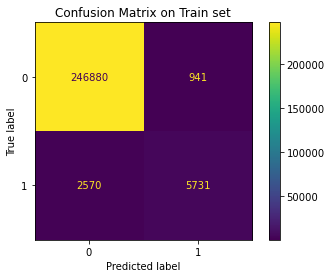

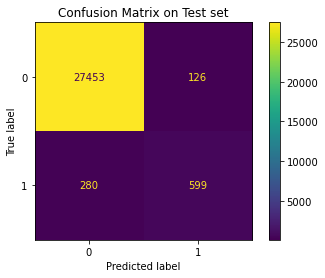

In [32]:
# Visualize confusion matrices (which predictions are exact, as well as the amount of false positives and false negatives).
_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Train set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Test set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

* True-positive = how often correctly predicts YES (Good).
* True-negative = how often correctly predicts NO (Good).
* False-positive = how often badly predict YES (Bad)
* False-negative = how often badly predict NO (Bad).

In [33]:
# what a confusion matrix is
df = {'' : ['Reality N0', 'Reality YES'],
    'Predicted NO': ['True Negative (Good)', 'False Negative (Bad)'],
    'Predicted YES': ['False Positive (Bad)', 'True Positive (Good)']}
df = pd.DataFrame(df)
display(df)

,,Predicted NO,Predicted YES
0,Reality N0,True Negative (Good),False Positive (Bad)
1,Reality YES,False Negative (Bad),True Positive (Good)


**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [34]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [35]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [36]:
# Sanity check (no target)
data_without_labels.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [37]:
# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")
print(X_without_labels[0:5,:])

Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [38]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = feature_encoder.transform(X_without_labels)
print("...Done")
print('X_without_labels')
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
X_without_labels
[[-0.31043545  3.32731798  0.          1.          0.          0.
   0.          1.        ]
 [-1.03634713  0.03774782  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17350567 -1.15845951  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17350567  0.33679965  0.          0.          1.          1.
   0.          0.        ]
 [-0.67339129 -0.56035585  0.          0.          0.          0.
   0.          1.        ]]


In [39]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {'converted': classifier.predict(X_without_labels)}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_LParat.csv', index=False)

In [40]:
Y_predictions.describe()        

,converted
count,31620.000000
mean,0.025996
std,0.159126
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [41]:
Y_predictions.head()

,converted
0,1
1,0
2,0
3,0
4,0


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

## Conclusion 👨‍🎓
**After several setup I choose to take into account all features instead only one feature and keep test_size=0.1 and random_state=42.**

**To improve the newsletter's conversion rate my recommandation could be to develop web page in Chinese/mandarin. 🇨🇳**

**As we can observe "total_pages_visited" is the main driver for "conversion" and China is the second country in term of users 😃 but the last in term of conversion.😉**

By Luc Parat 😎 2022/09

lucparat1@gmail.com

https://share.vidyard.com/watch/ZLhXNXXZrKKCkFeJZQxoeb?